<a href="https://colab.research.google.com/github/Sudo-CHRIS-dev/Prediction-of-Product-Sales/blob/main/Project_1_Prediction_of_Product_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prediction of Product Sales

- Author: Christian Bam

## Project Overview

## Load and Inspect Data

In [2]:
# Import required packages
import pandas as pd
import missingno as msno
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [3]:
# Save the filepath and load the data
fpath = '/content/sales_predictions_2023.csv'
df_sales = pd.read_csv(fpath)

In [4]:
# Display the info summary.
df_sales.info()
# Display the first 5 rows.
df_sales.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


## Clean Data

In [5]:
#1) How many rows and columns?
df_sales.shape

(8523, 12)

In [6]:
#2) What are the datatypes of each variable?
df_sales.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [7]:
#3) Are there duplicates? If so, drop any duplicates.
df_sales.duplicated().sum()

#No duplicates, if there were I would use this to remove them
#(df_titanic = df_titanic.drop_duplicates())

0

In [8]:
#4) Identify missing values.
df_sales.isna().sum()/len(df_sales) * 100

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

In [9]:
#5) Address the missing values by using a placeholder value.
Missingobjcol = df_sales.select_dtypes('object').columns
df_sales[Missingobjcol] = df_sales[Missingobjcol].fillna("MISSING")

Missingnumcol = df_sales.select_dtypes('number').columns
df_sales[Missingnumcol] = df_sales[Missingnumcol].fillna(-1)

In [10]:
#6) Confirm that there are no missing values after addressing them.
df_sales.isna().sum()/len(df_sales) * 100

Item_Identifier              0.0
Item_Weight                  0.0
Item_Fat_Content             0.0
Item_Visibility              0.0
Item_Type                    0.0
Item_MRP                     0.0
Outlet_Identifier            0.0
Outlet_Establishment_Year    0.0
Outlet_Size                  0.0
Outlet_Location_Type         0.0
Outlet_Type                  0.0
Item_Outlet_Sales            0.0
dtype: float64

In [11]:
#7) Find and fix any inconsistent categories of data (for example: fix cat, Cat, and cats so that they are consistent).
#Find categories
objectcols = df_sales.select_dtypes('object').columns
df_sales[objectcols].nunique()

Item_Identifier         1559
Item_Fat_Content           5
Item_Type                 16
Outlet_Identifier         10
Outlet_Size                4
Outlet_Location_Type       3
Outlet_Type                4
dtype: int64

In [12]:
#7) Find and fix any inconsistent categories of data (for example: fix cat, Cat, and cats so that they are consistent).

#We do not want to keep categorical features with so many categories.
df_sales = df_sales.drop(columns=['Item_Identifier'])

In [13]:
#7) Find and fix any inconsistent categories of data (for example: fix cat, Cat, and cats so that they are consistent).
objectcols = df_sales.select_dtypes('object').columns
# loop through the list of string columns
for category in objectcols:
  # print the value counts for the column
  print(df_sales[category].value_counts())
  # Print an empty line for readability
  print()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

Medium     2793
MISSING    2410
Small      2388
High        932
Name: Outlet_Size, dtype: int64

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

Supermar

In [14]:
#7) Find and fix any inconsistent categories of data (for example: fix cat, Cat, and cats so that they are consistent).
# Replace values in 'Item_Fat_Content' column
df_sales['Item_Fat_Content'] = df_sales['Item_Fat_Content'].replace({'LF':'Low Fat', 'low fat':'Low Fat', 'reg':'Regular'})
# Check the value counts again to confirm
df_sales['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [15]:
#7) Find and fix any inconsistent categories of data (for example: fix cat, Cat, and cats so that they are consistent).
# Replace values in 'Item_Fat_Content' column
df_sales['Outlet_Size'] = df_sales['Outlet_Size'].replace({'High':'Large'})
# Check the value counts again to confirm
df_sales['Outlet_Size'].value_counts()

Medium     2793
MISSING    2410
Small      2388
Large       932
Name: Outlet_Size, dtype: int64

In [16]:
#8) For any numerical columns, obtain the summary statistics of each (min, max, mean).
df_sales.describe().loc[['mean','min','max']]

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
mean,10.478936,0.066132,140.992782,1997.831867,2181.288914
min,-1.000000,0.000000,31.290000,1985.000000,33.290000
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


## Exploratory Data Analysis

###Histograms

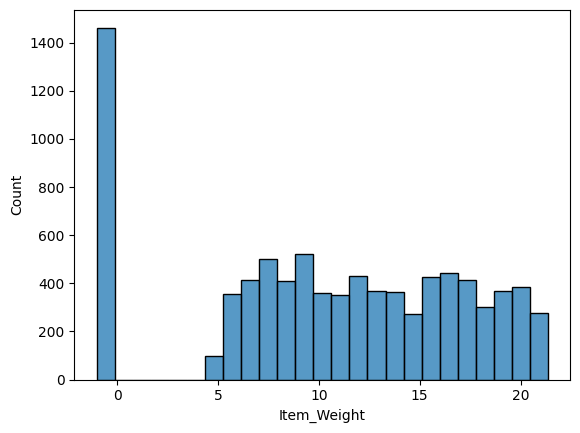

In [17]:
ax = sns.histplot(data = df_sales,
                  x='Item_Weight')

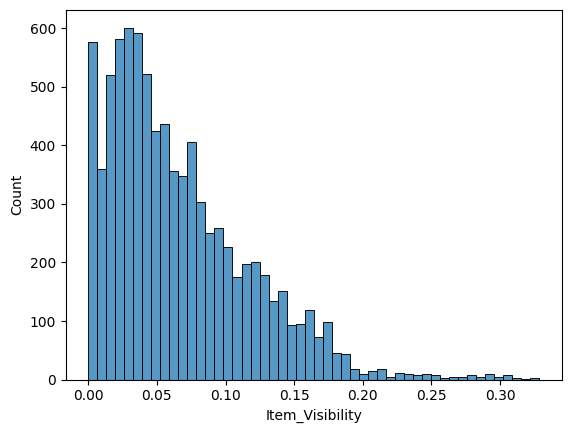

In [18]:
ax = sns.histplot(data = df_sales,
                  x='Item_Visibility')

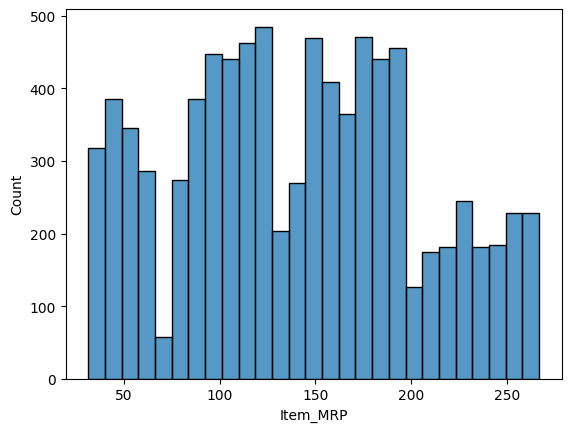

In [19]:
ax = sns.histplot(data = df_sales,
                  x='Item_MRP')

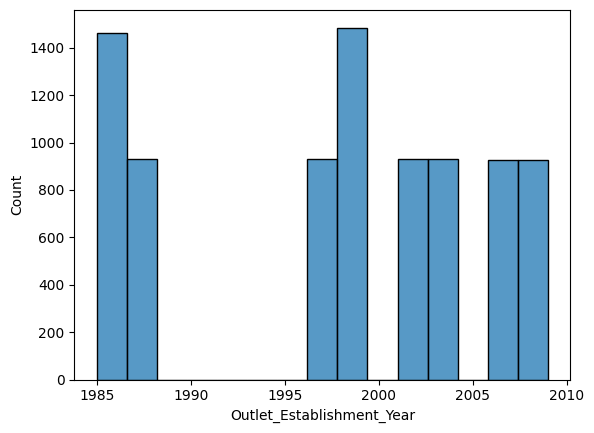

In [20]:
ax = sns.histplot(data = df_sales,
                  x='Outlet_Establishment_Year')

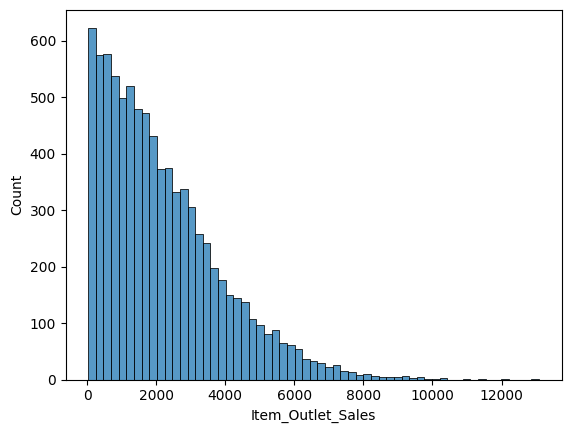

In [21]:
ax = sns.histplot(data = df_sales,
                  x='Item_Outlet_Sales')

###Boxplots

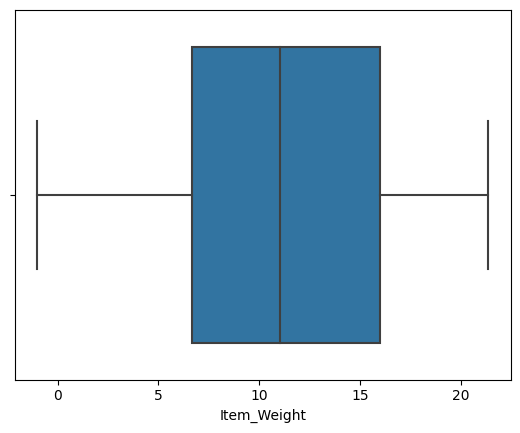

In [22]:
ax = sns.boxplot(x = 'Item_Weight', data = df_sales)

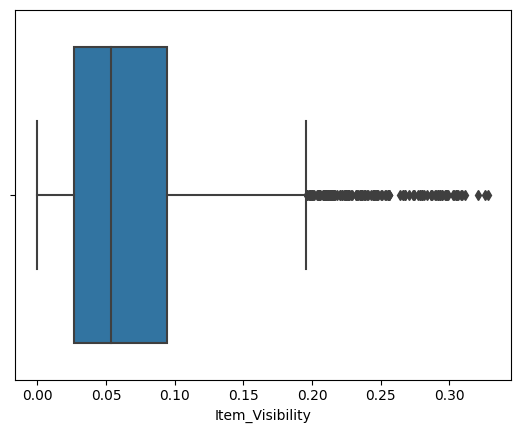

In [28]:
ax = sns.boxplot(x = 'Item_Visibility', data = df_sales)

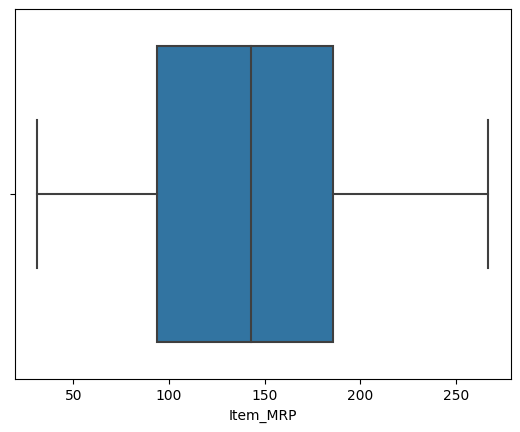

In [24]:
ax = sns.boxplot(x = 'Item_MRP', data = df_sales)

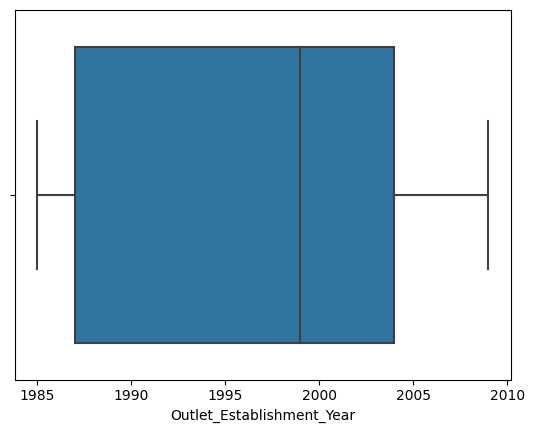

In [29]:
ax = sns.boxplot(x = 'Outlet_Establishment_Year', data = df_sales)

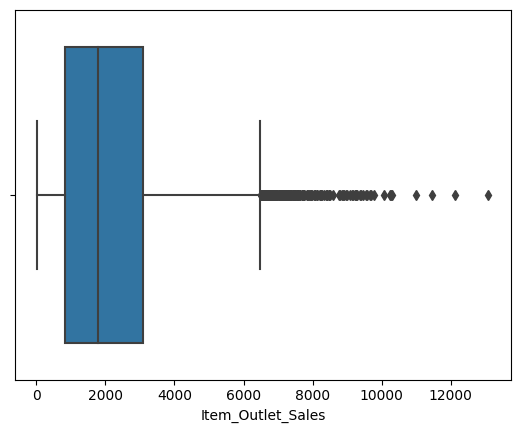

In [26]:
ax = sns.boxplot(x = 'Item_Outlet_Sales', data = df_sales)

### Countplots

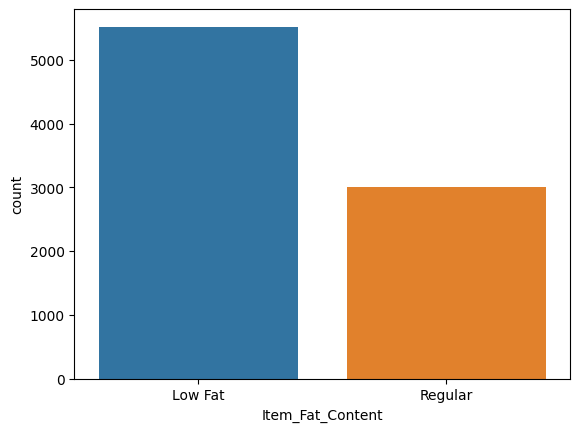

In [38]:
ax = sns.countplot(x = 'Item_Fat_Content', data = df_sales)

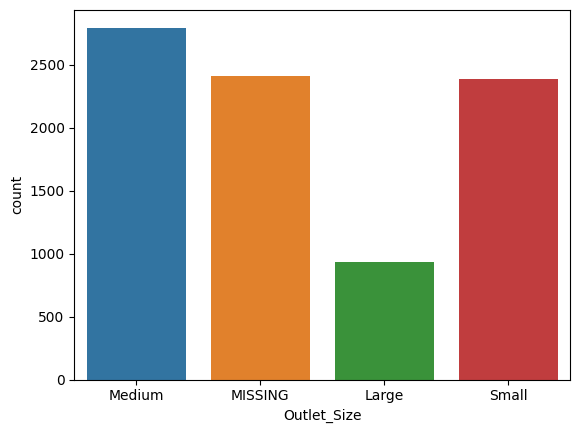

In [39]:
ax = sns.countplot(x = 'Outlet_Size', data = df_sales)

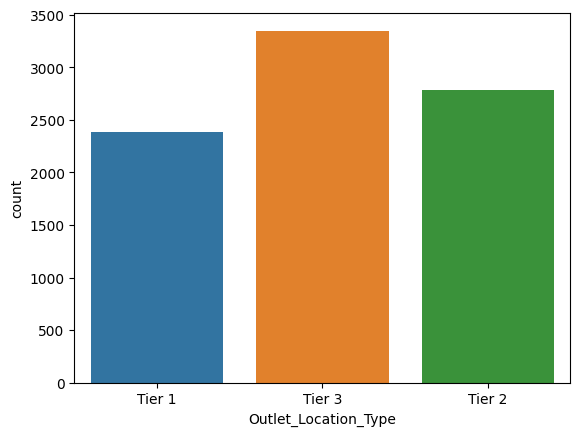

In [40]:
ax = sns.countplot(x = 'Outlet_Location_Type', data = df_sales)

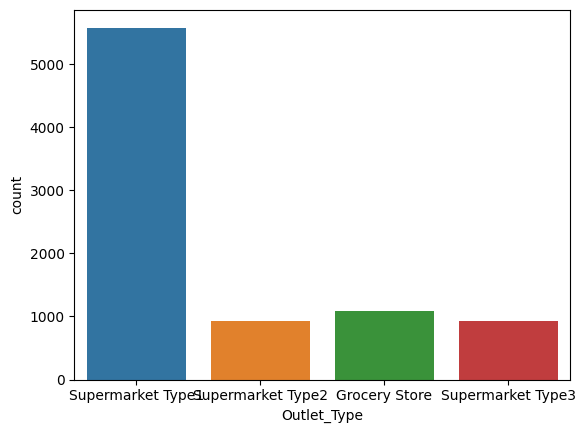

In [41]:
ax = sns.countplot(x = 'Outlet_Type', data = df_sales)

### Heatmap

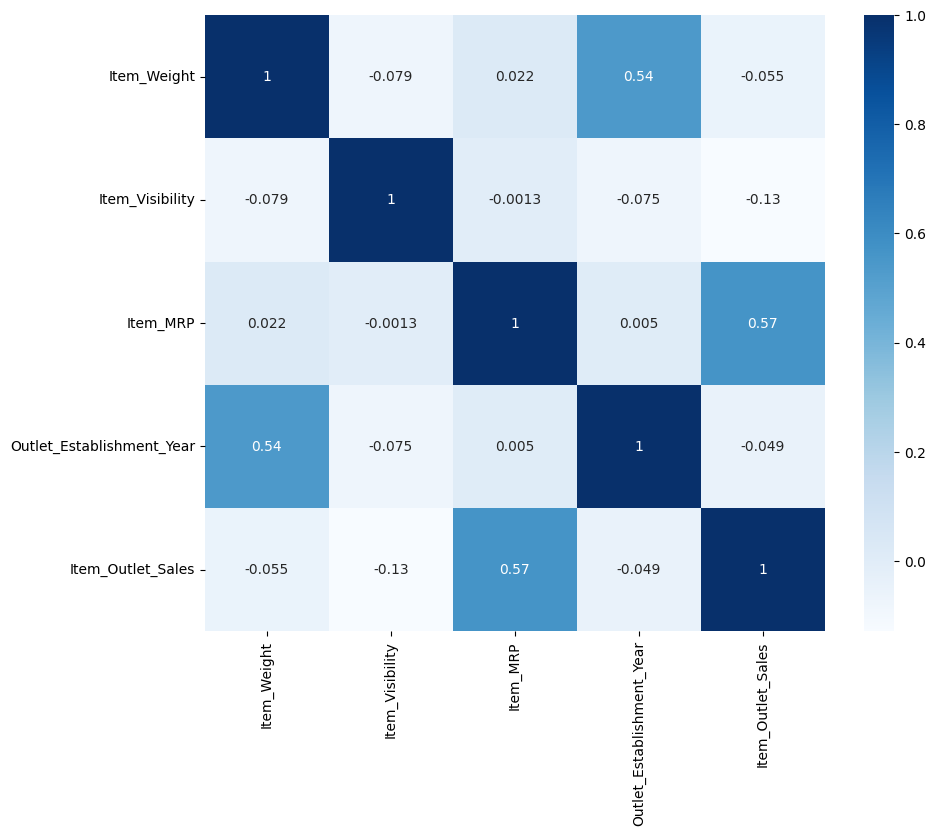

In [27]:
corr = df_sales.corr()
fig, ax = plt.subplots(figsize = (10, 8))
ax = sns.heatmap(corr, cmap= 'Blues', annot = True);

## Explanatory Data Analysis